# Data Normalization in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])

df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


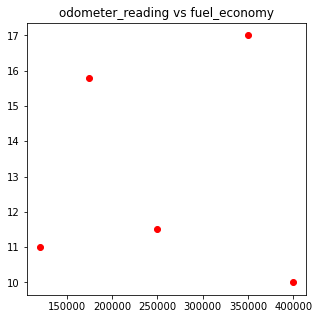

In [2]:
plt.figure(figsize=(5, 5))
plt.title('odometer_reading vs fuel_economy')
plt.scatter(df_cars['odometer_reading'],df_cars['fuel_economy'], color='red')
plt.show()

### The maximum absolute scaling

In [3]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
# call the maximum_absolute_scaling function
df_cars_scaled = maximum_absolute_scaling(df_cars)

df_cars_scaled

,odometer_reading,fuel_economy
0,0.3000,0.647059
1,0.6250,0.676471
2,0.4375,0.929412
3,0.8750,1.000000
4,1.0000,0.588235


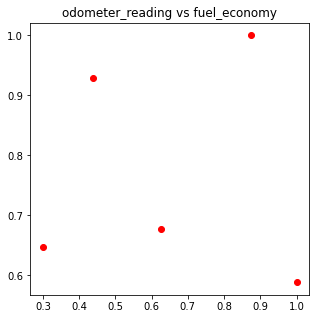

In [4]:
plt.figure(figsize=(5, 5))
plt.title('odometer_reading vs fuel_economy')
plt.scatter(df_cars_scaled['odometer_reading'],df_cars_scaled['fuel_economy'], color='red')
plt.show()

### The Min-max scaling

In [5]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_cars_normalized = min_max_scaling(df_cars)

df_cars_normalized

,odometer_reading,fuel_economy
0,0.000000,0.142857
1,0.464286,0.214286
2,0.196429,0.828571
3,0.821429,1.000000
4,1.000000,0.000000


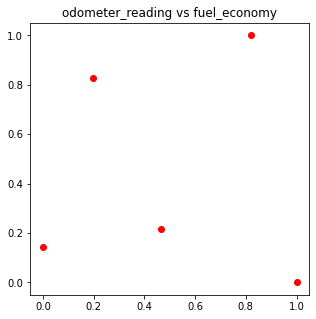

In [6]:
plt.figure(figsize=(5, 5))
plt.title('odometer_reading vs fuel_economy')
plt.scatter(df_cars_normalized['odometer_reading'],df_cars_normalized['fuel_economy'], color='red')
plt.show()

### Z-score method

In [7]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_cars_standardized = z_score(df_cars)

df_cars_standardized

,odometer_reading,fuel_economy
0,-1.189512,-0.659120
1,-0.077019,-0.499139
2,-0.718842,0.876693
3,0.778745,1.260647
4,1.206628,-0.979081


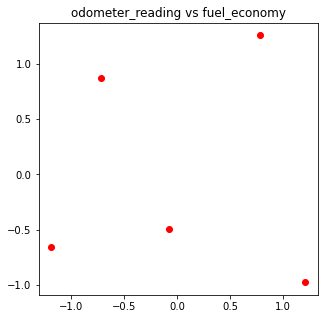

In [8]:
plt.figure(figsize=(5, 5))
plt.title('odometer_reading vs fuel_economy')
plt.scatter(df_cars_standardized['odometer_reading'],df_cars_standardized['fuel_economy'], color='red')
plt.show()

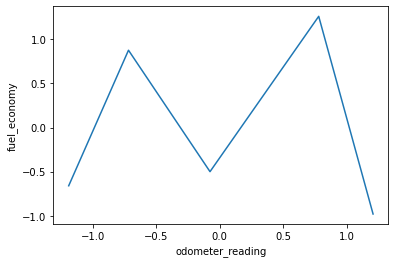

In [9]:
sns.lineplot(data=df_cars_standardized,x='odometer_reading', y='fuel_economy')

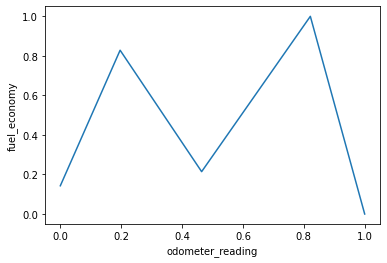

In [10]:
sns.lineplot(data=df_cars_normalized,x='odometer_reading', y='fuel_economy')

### Robust Scaling

In [11]:
# apply the robust scaling in Pandas using the .median() and .quantile() methods
def robust_scaling(df):
    # copy the dataframe
    df_robust = df.copy()
    # apply robust scaling
    for column in df_robust.columns:
        df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - 
                                                                                 df_robust[column].quantile(0.25))
    return df_robust
    
# call the robust_scaling function
df_cars_robust = robust_scaling(df_cars)

df_cars_robust

,odometer_reading,fuel_economy
0,-0.742857,-0.104167
1,0.000000,0.000000
2,-0.428571,0.895833
3,0.571429,1.145833
4,0.857143,-0.312500


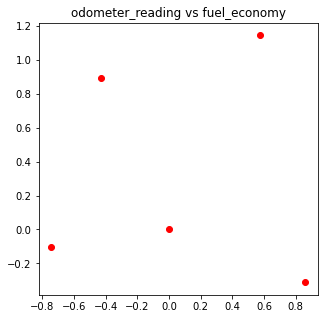

In [12]:
plt.figure(figsize=(5, 5))
plt.title('odometer_reading vs fuel_economy')
plt.scatter(df_cars_robust['odometer_reading'],df_cars_robust['fuel_economy'], color='red')
plt.show()

In [13]:
# the data frame contains one outlier
df_data = pd.DataFrame({'variable1':[1,2,3,4,5,6,7,30], 'variable2':[1,2,3,4,5,6,7,8]})

df_data

,variable1,variable2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,30,8


Text(0.5, 1.0, 'The min-max scaling')

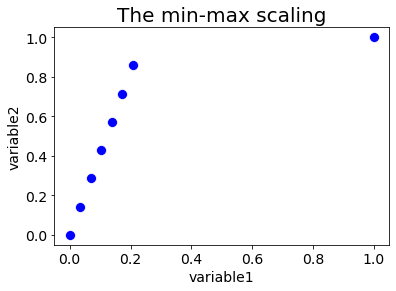

In [14]:
#applying min_max_scaling
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_min_max = min_max_scaling(df_data)

# scatter plot of the data after applying min-max scaling
sns.scatterplot(x='variable1', y='variable2', data=df_min_max, s=100, color='blue')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('variable1', fontsize=14)
plt.ylabel('variable2', fontsize=14)
plt.title('The min-max scaling', fontsize=20)

In [15]:
# apply the robust scaling in Pandas using the .median() and .quantile() methods
def robust_scaling(df):
    # copy the dataframe
    df_robust = df.copy()
    # apply robust scaling
    for column in df_robust.columns:
        df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - df_robust[column].quantile(0.25))
    return df_robust
    
# call the robust_scaling function
df_robust = robust_scaling(df_data)

df_robust

,variable1,variable2
0,-1.000000,-1.000000
1,-0.714286,-0.714286
2,-0.428571,-0.428571
3,-0.142857,-0.142857
4,0.142857,0.142857
5,0.428571,0.428571
6,0.714286,0.714286
7,7.285714,1.000000


Text(0.5, 1.0, 'The robust scaling')

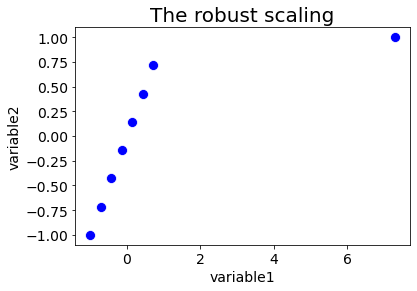

In [16]:
sns.scatterplot(x='variable1', y='variable2', data=df_robust, s=100, color='blue')

# xticks and yticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('variable1', fontsize=14)
plt.ylabel('variable2', fontsize=14)
plt.title('The robust scaling', fontsize=20)